(sec_newton_raphson)=
# Newton-Raphson method

The key step of iterative methods is how to propose a new candidate of root based on the previous candidates.  The derivative of the function provides can be a good resource to construct the  next candidate. Suppose that the $n$-th candidate $x_n$ was not good enough. What informnation can be used  to propose a new candidate?  The slope of the function should provide a useful information.  The Neton-Raphson and secant methods, both utilize the derivative function to propose a better candidate,.

## Newton-Raphson method

We approximate the function using Taylor expansion around $x_n$ as follows:

$$
f(x) \approx f(x_n) + f'(x_n) (x-x_n) 
$$(eq-taylor-1)

Then, the original equation $f(x)=0$ is approximated by

$$
f(x_n) + f'(x_n) (x-x_n) = 0
$$

The root of this equation is the next candidate, that is

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$(eq-newton-raphson)

which should be closer to the root than $x_n$ as Fig. {numref}`fig-newton-raphson` illustrate.  Repeating this procedure, $x_n$ approaches the root rather quickly.

We need a reasonable criteria for terminating the iteration. Let us denote the root as $x^*$. From Eq. {eq}`eq-taylor-1` we have

$$
f(x^*) = f(x_n) + (x^*-x_n) f'(x_n)
$$

By definition, $f(x^*)=0$.  Then, the error is estimated as $|x^*-x_n| =  \left | \displaystyle\frac{f(x_n)}{f'(x_n)} \right | = |x_{n+1}-x_n|$.  Hence, we stop the iteration when $|x_{n+1}-x_n| < \text{tolerance}$.

Note that this method does not require initial bracketing.  However, 
this method works great only if the initial point is sufficiently close to the root. Otherwise it is not guaranteed to converge to the target root.  It might reach another root which you are not looking for. 
In order to avoid this failure, find a rough estimate of root using the bisection method and switch to the Newton-Raphson method for the further improvement.  While the bisection method is relatively robust many iterations are needed.  On the other hand, the Newton-Raphson method converges faster.  Therefore, such a hybrid method make a sense. 


```{figure} newton_raphson.png
---
height: 300px
name: fig-newton-raphson
---
The Newton-Raphson method. The straight line tangent to the curve at the current candidate $x_n$ is used to find a new imroved candidate $x_{n+1}$.  If $x_n$ is already close to the root, this procedure rapidly converges to it.
```

```{admonition} Algorithm: Newton-Raphson

1. Set a tolerance $rtol$.
2. Choose an initial guess $x_{0}$ and let $n=0$.
3. Estimate a new candidate by $x_{n+1} = x_n - \displaystyle\frac{f(x_n)}{f'(x)}$.
4. If $|f(x_{n+1})| < rtol$, then $x_{n+1}$ is the root.  Stop the iteration.
5. If not, increment $n$ and repeat from step 3.

```

**Example**  We solve $x^3 - 9 x^2 +23 x - 15=0$. again but with the Newton-Raphson method this time.

In [1]:
import numpy as np

def func(x):
    return [x**3-9*x**2+23*x-15, 3*x**2 - 18*x + 23]

# set tolerance
rtol = 1.e-8

# set the initial candiate
x = 4.1

# set the maximum itertation
nmax = 100


# Newton-Raphson method
n = 0
[fx,dfx] = func(x)

while abs(fx) > rtol and n < nmax:
    x = x - fx/dfx
    [fx,dfx] = func(x)
    n+=1

print("root= {0:10.7e}, f(x)= {1:15.8e}, iteration= {2:3d}".format(x, fx, n))

root= 1.0000000e+00, f(x)= -3.55271368e-15, iteration=   9


In this example, the Newtoin-Raphson itertation started from $x=4.1$.  The nearest root to the starting point is $5$ and the second nearest $3$.  However, it found the root at $x=1$.  The following plot shows that the tangent line (red line) at the initial point crosses the $x$ axis around $x=-4$.  Then, the nearest root to it is $1$.  As you can see that the root found by the Newton-Raphson method is not necessarily the nearest to the initial point. If we want to get a p[articular root, we use the bisection method for first several iteration and switch to the Newton-Raphson method. 

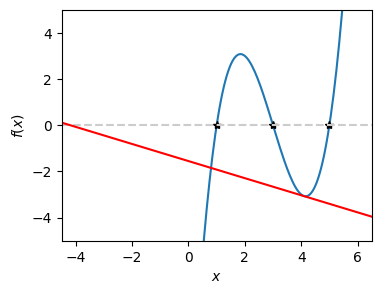

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3-9*x**2+23*x-15

def df(x):
    return 3*x**2 - 18*x + 23
    
x=np.linspace(-4,6,201)
y=f(x)

plt.figure(figsize=(4,3))
plt.plot(x,y)
plt.plot([1,3,5],[0,0,0],'*k')
plt.ylim(-5,5)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")

plt.axhline(y = 0, color = '0.8', linestyle = '--')

x0=4.1
fx=f(x0)
dfx=df(x0)

plt.axline((x0, fx), slope=dfx, color="red", linestyle='-')

## Secant Method

The Newton-Raphson method requires the analytic expression of the first order derivative, which limits the range of applications. However, the same idea can be used without the analytic expression.  If we replace the analytic derivative with the numerical derivative (see Chapter {numref}`chap_derivative` ), the Newton-Raphson procedure still works.  Using the backward finite difference method, the recursive equation {eq}`eq-newton-raphson` becomes

$$
x_{n+1} = x_n - \frac{x_{n}-x_{n-1}}{f(x_n)-f(x_{n-1})} f(x_n)
$$

This method is commonly known as the secant method. Use the bisection method before starting the secant method to ensure the convergence.

One problem is that this method needs two points to start the iteration. However, this is not a big issue since we can pick any point close to the initial guess. If the root is already bracketed between $a$ and $b$, use $x_1 = x_0 + \Delta$ with $\Delta \ll b-a$. If the secant method is preceded by the bisection method, use the final bracket from the bisection calculation.  Then, $\Delta = (b-a)/10$ is good enough.

```{admonition} Algorithm: Secant
1. Set a tolerance $xtol$ or $ftol$. 
2. Choose two initial points $x_0$ and $x_1 = x_0 + \delta$.
3. Reset thne counter $n=1$
4. Estimate a new candidate by $x_{n+1} = x_n - \displaystyle\frac{x_n-x_{n-1}}{f(x_n)-f(x_{n-1})} f(x_n)$.
5. If $|x_{n+1}-x_n| < xtol$ and/or $f(x_{n+1}) < ftol$, then $x_{n+1}$ is the root.  Stop the iteration.
6. Otherwise, increment $n$ and go to step 4.
```

**Example**  We solve $x^3 - 9 x^2 +23 x - 15=0$ one more time but with the secant method this time.

In [3]:
import numpy as np

def f(x):
    return x**3-9*x**2+23*x-15

# set tolerance
ftol = 1.e-8

# set the initial candidate
x1 = 4.0
x2 = 4.1

# set the maximum iteration
nmax = 100

f1 = f(x1)
f2 = f(x2)

n = 0
while abs(f2)> ftol and n<nmax:
    x = x2 - (x2-x1)/(f2-f1)*f2
    x1 = x2
    f1 = f2
    x2 = x
    f2 = f(x)
    n+=1

print("root= {0:10.7e}, f(x)= {1:15.8e}, iteration= {2:3d}".format(x2, f2, n))

root= 5.0000000e+00, f(x)= -1.61861635e-11, iteration=   8


Notice that the secant method found a root nearest to the pair of the initial points.

## Advanced Methods

The secant method has various weakness, namely it is not guaranteed to converge.  For example, if it happens that $f(x_n) = 0$ or very close to 0, the iteration cannot continue.  To overcome this difficulty, a hybrid method combining the bisection method and the secant method, which called the [Brent method](https://en.wikipedia.org/wiki/Brent%27s_method), or Brent-Dekker method.  We do not discuss the method in this lecture.  In the following section, a canned routine of Brent method is shown.

## Canned routines

Now we know the pros and cons of the Newton-Raphson method.  So, we use canned routines carefully. `scipy.optimize` provides `newton`.  See the [usage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html).

**Example** Solve the same problem with `scipy.op[timize.newton`.

In [4]:
# Solves x**3-9*x**2+23*x-15=0 by the Newton-Raphson method

import numpy as np
from scipy.optimize import newton

def f(x):
    return x**3-9*x**2+23*x-15

def df(x):
    return 3*x**2 - 18*x + 23

x0 = 4.1
xtol=1e-6

# derivative is specified with 'fprime=' option
newton(f, x0, fprime=df,tol=xtol)

np.float64(0.9999999999999993)

You don't see the secant method in `scipy.optimize`.  Actually, there is but hidden in `newton`.  If the option `fprime=` is not specified, it automatically uses the secant method.  It does not require the second initial position.  The routine will generate the second point automatically.

In [5]:
# Solves x**3-9*x**2+23*x-15=0 by the secant method

import numpy as np
from scipy.optimize import newton

def f(x):
    return x**3-9*x**2+23*x-15

x0 = 4.1
xtol=1e-6

# if 'fprime=' option is not used,
# 'newton' uses the secant method.
newton(f, x0,tol=xtol)

np.float64(5.000000000001222)

Notice again that a different root from the Newtow-Raphson is obtained,  which is the nearest to the initial position.

The Brent method is also provided by `scipy.optimize.brentq`.

In [6]:
# Solves x**3-9*x**2+23*x-15=0 by the Brent method

import numpy as np
from scipy.optimize import brentq

def f(x):
    return x**3-9*x**2+23*x-15
    
# The initial braket is taken from the previouse section.
x1=2.50656e+00
x2=3.16192e+00

brentq(f,x1,x2)

2.999999999999995


___

Last modified on 3/13/2024 by R. Kawai